In [1]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/한국에너지공단_제로에너지건축물 인증현황_20231231.csv',encoding='cp949')

In [2]:
# 공백 제거 및 데이터 타입 변환
df['에너지자립률'] = df['에너지자립률'].str.replace(' ', '').astype('float64')

# 데이터 타입 확인 및 변환
df['인증구분'] = df['인증구분'].astype('object')
df['건물주용도'] = df['건물주용도'].astype('object')
df['건물용도'] = df['건물용도'].astype('object')
df['지역'] = df['지역'].astype('object')
df['건축물명'] = df['건축물명'].astype('object')
df['업체명'] = df['업체명'].astype('object')
df['제로에너지건축물 인증등급(ZEB)'] = df['제로에너지건축물 인증등급(ZEB)'].astype('object')
df['인증일자'] = pd.to_datetime(df['인증일자'], errors='coerce')


In [3]:
# 결측값 확인
missing_values = df.isnull().sum()

In [4]:
missing_values

인증구분                  0
건물주용도                 0
건물용도                  0
에너지자립률                0
지역                    0
건축물명                  0
업체명                   0
제로에너지건축물 인증등급(ZEB)    0
인증일자                  0
dtype: int64

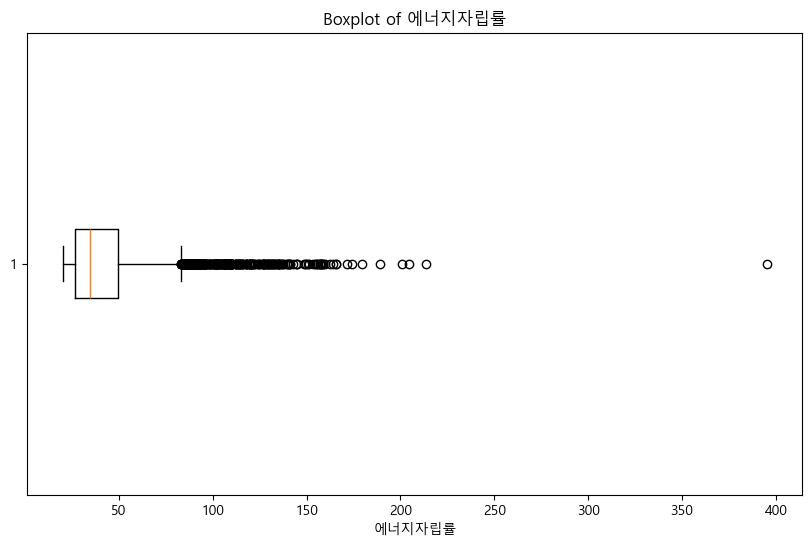

In [5]:
import matplotlib.pyplot as plt

#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(df['에너지자립률'], vert=False)
plt.title('Boxplot of 에너지자립률')
plt.xlabel('에너지자립률')
plt.show()

In [6]:
# 에너지자립률이 200 이상인 데이터 삭제
df = df[df['에너지자립률'] < 200]

In [7]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()

# 라벨 인코딩할 열 목록
categorical_columns = ['인증구분', '건물주용도', '건물용도', '지역', '건축물명', '업체명', '제로에너지건축물 인증등급(ZEB)']

# 각 열에 대해 라벨 인코딩 수행
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
# 7. 결과 확인
print("라벨 인코딩된 데이터 프레임의 일부:")
print(df.head())

라벨 인코딩된 데이터 프레임의 일부:
   인증구분  건물주용도  건물용도  에너지자립률  지역  건축물명  업체명  제로에너지건축물 인증등급(ZEB)       인증일자
0     0     24     1   45.57   6  3449  831                   3 2023-12-29
1     1      3     1   36.09  16  2421  781                   4 2023-12-29
2     1      3     1   32.80   1   135  159                   4 2023-12-29
3     1     24     1   34.78  10  2778  822                   4 2023-12-29
4     1      4     1   44.42   5    18  354                   3 2023-12-29


In [10]:
# 7. 형식 변환
df['인증일자'] = pd.to_datetime(df['인증일자'], format='%Y-%m-%d', errors='coerce')